In [32]:
# pip install pytrends matplotlib pandas seaborn plotly

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


# setup pytrend library and keyword define

In [34]:
pytrends = TrendReq(hl='en-US', tz=360)  # Fixed parameter name: changed 'h1' to 'hl'
keyword = "cloud computing"

# data request

In [35]:
pytrends.build_payload([keyword],cat = 0, timeframe ='today 12-m',geo='', gprop='')

# country wise intrest

In [36]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending = False).head(15)

C:\Users\kunda\AppData\Local\Temp\ipykernel_3544\3924950205.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




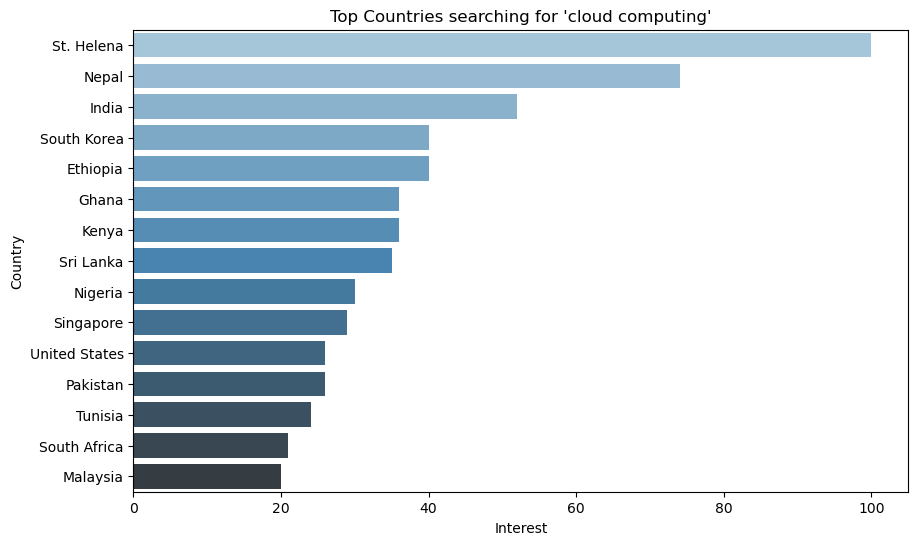

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x= region_data[keyword], y=region_data.index, palette = "Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# world map

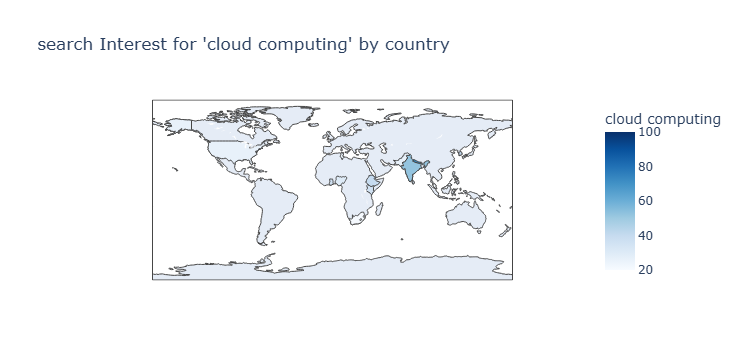

In [38]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                   locations='geoName',
                   locationmode='country names',
                   color=keyword,
                   title=f"search Interest for '{keyword}' by country",
                   color_continuous_scale='Blues')
fig.show()

# time wise interest

In [39]:
time_df=pytrends.interest_over_time()

C:\Users\kunda\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



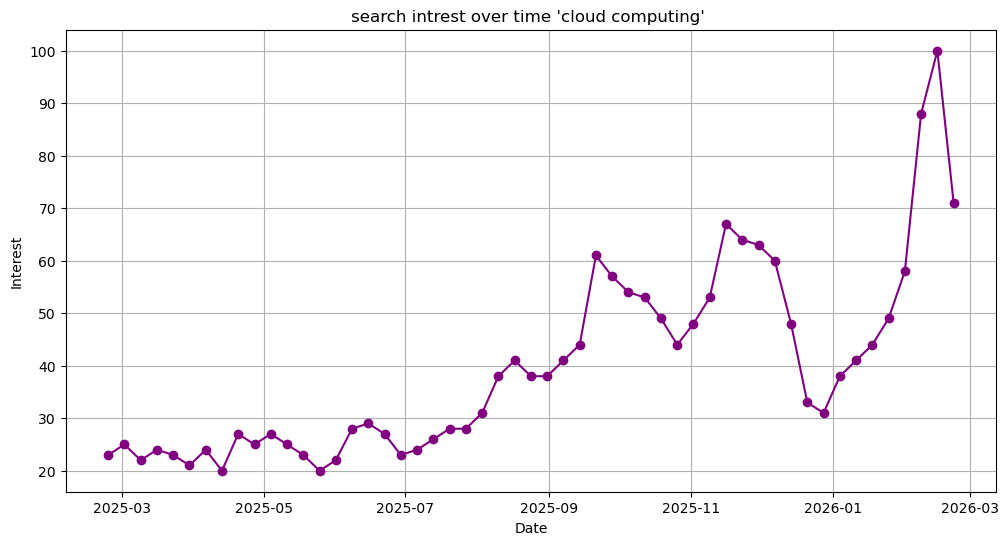

In [40]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker ='o', color = 'purple')
plt.title(f"search intrest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


# multiple keywords compare

In [41]:
kw_list = ["cloud computing ", "data science ", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe ='today 12-m',geo='', gprop='')

C:\Users\kunda\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



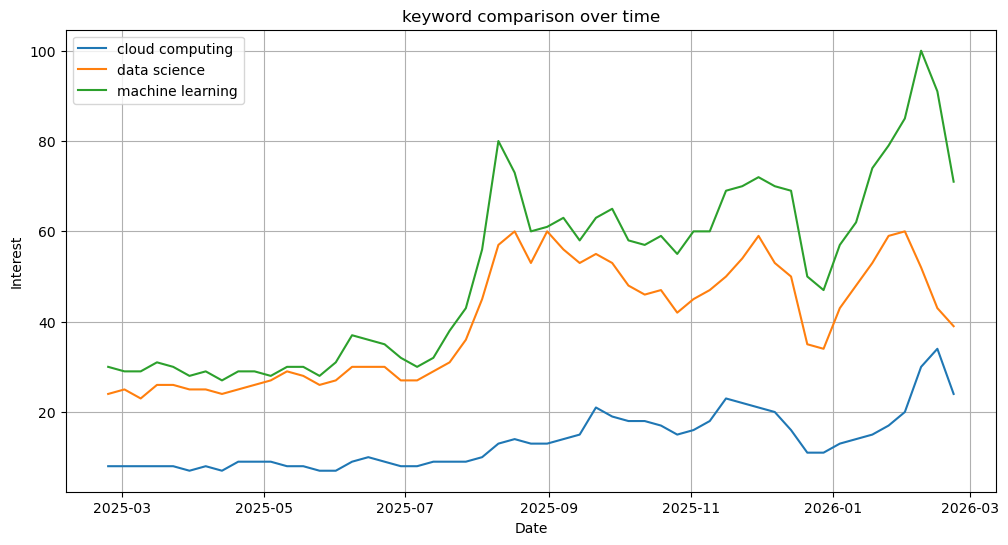

In [42]:
compare_df= pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw],label=kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.show()